In [43]:
import pandas as pd

# Veri dosyalarını yükleme
lap_times_df = pd.read_csv('Dataset/lap_times.csv')
pit_stops_df = pd.read_csv('Dataset/pit_stops.csv')
races_df     = pd.read_csv('Dataset/races.csv')
circuits_df  = pd.read_csv('Dataset/circuits.csv')

# İlk birkaç satırı göstererek verilerin genel bir görünümünü sağlayalım
lap_times_df.head(), pit_stops_df.head(), races_df.head(), circuits_df.head()



(   raceId  driverId  lap  position      time  milliseconds
 0     841        20    1         1  1:38.109         98109
 1     841        20    2         1  1:33.006         93006
 2     841        20    3         1  1:32.713         92713
 3     841        20    4         1  1:32.803         92803
 4     841        20    5         1  1:32.342         92342,
    raceId  driverId  stop  lap      time duration  milliseconds
 0     841       153     1    1  17:05:23   26.898         26898
 1     841        30     1    1  17:05:52   25.021         25021
 2     841        17     1   11  17:20:48   23.426         23426
 3     841         4     1   12  17:22:34   23.251         23251
 4     841        13     1   13  17:24:10   23.842         23842,
    raceId  year  round  circuitId                   name        date  \
 0       1  2009      1          1  Australian Grand Prix  2009-03-29   
 1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
 2       3  2009      3      

In [51]:
lap_times_df  = lap_times_df.query('raceId >= 841')
pit_stops_df  = pit_stops_df.query('raceId >= 841')

races_df      = races_df.query('raceId>= 841')

In [45]:
# Her pistte yapılan yarış sayısını hesaplayalım
circuit_race_counts = races_df.groupby('circuitId').size().reset_index(name='race_count')
# 
# # En az 5 defa yarış yapılan pistleri filtreleyelim
circuits_with_min_5_races = circuit_race_counts[circuit_race_counts['race_count'] >= 10]
# 
# Filtrelenmiş pistlerin isimlerini circuits_df ile birleştirelim
circuits_with_min_5_races_named = pd.merge(circuits_with_min_5_races, circuits_df[['circuitId', 'name']], on='circuitId', how='left')
# 
circuits_with_min_5_races_named

,circuitId,race_count,name
0,1,11,Albert Park Grand Prix Circuit
1,3,13,Bahrain International Circuit
2,4,13,Circuit de Barcelona-Catalunya
3,6,12,Circuit de Monaco
4,7,11,Circuit Gilles Villeneuve
5,9,14,Silverstone Circuit
6,11,13,Hungaroring
7,13,13,Circuit de Spa-Francorchamps
8,14,13,Autodromo Nazionale di Monza
9,15,11,Marina Bay Street Circuit


In [62]:
for row in races_df.index.values:
    print(races_df.loc[row])
    # break
    
    if not races_df.loc[row]['circuitId'] in circuits_with_min_5_races_named['circuitId']:
        races_df.drop(index = row, axis=1, inplace=True)
    # 

raceId                                                       841
year                                                        2011
round                                                          1
circuitId                                                      1
name                                       Australian Grand Prix
date                                                  2011-03-27
time                                                    06:00:00
url            http://en.wikipedia.org/wiki/2011_Australian_G...
fp1_date                                                      \N
fp1_time                                                      \N
fp2_date                                                      \N
fp2_time                                                      \N
fp3_date                                                      \N
fp3_time                                                      \N
quali_date                                                    \N
quali_time               

In [63]:
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
840,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
843,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
844,846,2011,6,6,Monaco Grand Prix,2011-05-29,12:00:00,http://en.wikipedia.org/wiki/2011_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1106,2023,8,7,Canadian Grand Prix,2023-06-18,18:00:00,https://en.wikipedia.org/wiki/2023_Canadian_Gr...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,\N,\N
1088,1108,2023,10,9,British Grand Prix,2023-07-09,14:00:00,https://en.wikipedia.org/wiki/2023_British_Gra...,2023-07-07,11:30:00,2023-07-07,15:00:00,2023-07-08,10:30:00,2023-07-08,14:00:00,\N,\N
1089,1109,2023,11,11,Hungarian Grand Prix,2023-07-23,13:00:00,https://en.wikipedia.org/wiki/2023_Hungarian_G...,2023-07-21,11:30:00,2023-07-21,15:00:00,2023-07-22,10:30:00,2023-07-22,14:00:00,\N,\N
1090,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,2023-07-29,10:30:00,\N,\N,2023-07-28,15:00:00,2023-07-29,14:30:00


In [71]:

first_laps = lap_times_df.groupby(['raceId', 'driverId'])['lap'].min().reset_index()
last_laps = lap_times_df.groupby(['raceId', 'driverId'])['lap'].max().reset_index()


# İlk ve son turlardaki pozisyonları birleştirme
first_lap_positions = pd.merge(first_laps, lap_times_df, on=['raceId', 'driverId', 'lap'], how='left')
last_lap_positions = pd.merge(last_laps, lap_times_df, on=['raceId', 'driverId', 'lap'], how='left')

# Başlangıç ve bitiş pozisyonlarını birleştirerek geçiş sayısını hesaplama
position_changes = pd.merge(first_lap_positions[['raceId', 'driverId', 'position']],
                            last_lap_positions[['raceId', 'driverId', 'position']],
                            on=['raceId', 'driverId'], suffixes=('_start', '_finish'))

# Geçiş sayısının hesaplanması: Pozitif değerler ilerleme, negatif değerler gerileme anlamına gelir
position_changes['position_change'] = abs(position_changes['position_finish'] - position_changes['position_start'])

# Her pist için ortalama pozisyon değişikliğini hesaplayarak en az geçişin olduğu pistleri bulma
race_circuit_mapping = races_df[['raceId', 'circuitId']]
position_changes_with_circuit = pd.merge(position_changes, race_circuit_mapping, on='raceId', how='left')
average_position_changes_per_circuit = position_changes_with_circuit.groupby('circuitId')['position_change'].mean().reset_index()

# Ortalama pozisyon değişikliğini sıralayarak en az geçiş olan pistleri belirleme
average_position_changes_per_circuit_sorted = average_position_changes_per_circuit.sort_values(by='position_change', ascending=True)

# Sonuçları pist isimleri ile birleştirme
top_10_circuits = pd.merge(average_position_changes_per_circuit_sorted, circuits_df[['circuitId', 'name']], on='circuitId', how='left')[:10]


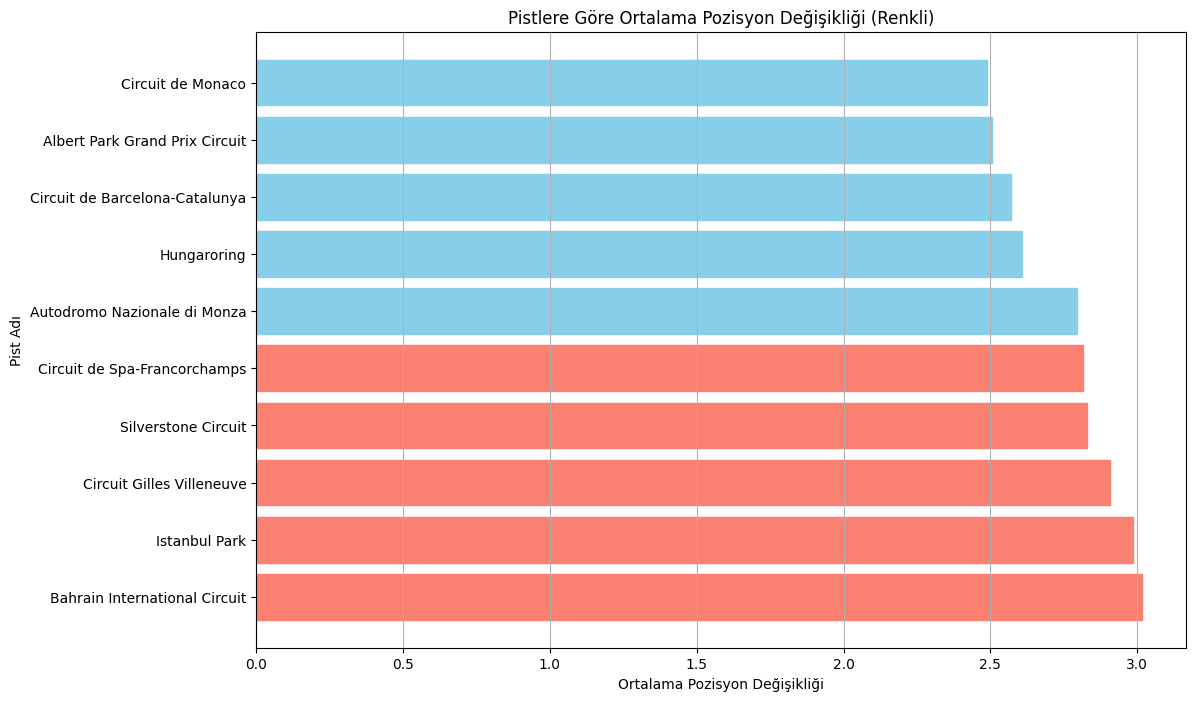

In [72]:
from matplotlib import pyplot as plt
import numpy as np

# Renkleri dinamik olarak atayalım - Pozisyon değişikliğine göre
colors = np.where(top_10_circuits["position_change"] < top_10_circuits["position_change"].median(), 'skyblue', 'salmon')

# Yeniden Bar Grafiği Çizimi - Farklı Renklerle
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_circuits['name'], top_10_circuits['position_change'], color=colors)
plt.xlabel('Ortalama Pozisyon Değişikliği')
plt.ylabel('Pist Adı')
plt.title('Pistlere Göre Ortalama Pozisyon Değişikliği (Renkli)')
plt.gca().invert_yaxis()  # En düşük değerli pisti üste almak için
plt.grid(axis='x')

# İsteğe bağlı olarak, her bar için renk açıklamasını ekleyebiliriz
for bar, color in zip(bars, colors):
    bar.set_edgecolor(color)

plt.show()